**Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report**

In [4]:
import pandas as pd
pd.set_option("display.max_columns",None)
df=pd.read_csv("hotel_bookings.csv")

In [5]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(81537, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81537 entries, 0 to 81536
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81537 non-null  object 
 1   is_canceled                     81537 non-null  int64  
 2   lead_time                       81537 non-null  int64  
 3   arrival_date_year               81537 non-null  int64  
 4   arrival_date_month              81537 non-null  object 
 5   arrival_date_week_number        81537 non-null  int64  
 6   arrival_date_day_of_month       81537 non-null  int64  
 7   stays_in_weekend_nights         81537 non-null  int64  
 8   stays_in_week_nights            81537 non-null  int64  
 9   adults                          81537 non-null  int64  
 10  children                        81533 non-null  float64
 11  babies                          81537 non-null  int64  
 12  meal                            

**Detect Duplicated Values**

In [8]:
df.duplicated().sum()

np.int64(25209)

**Detect Missing Values**

In [9]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


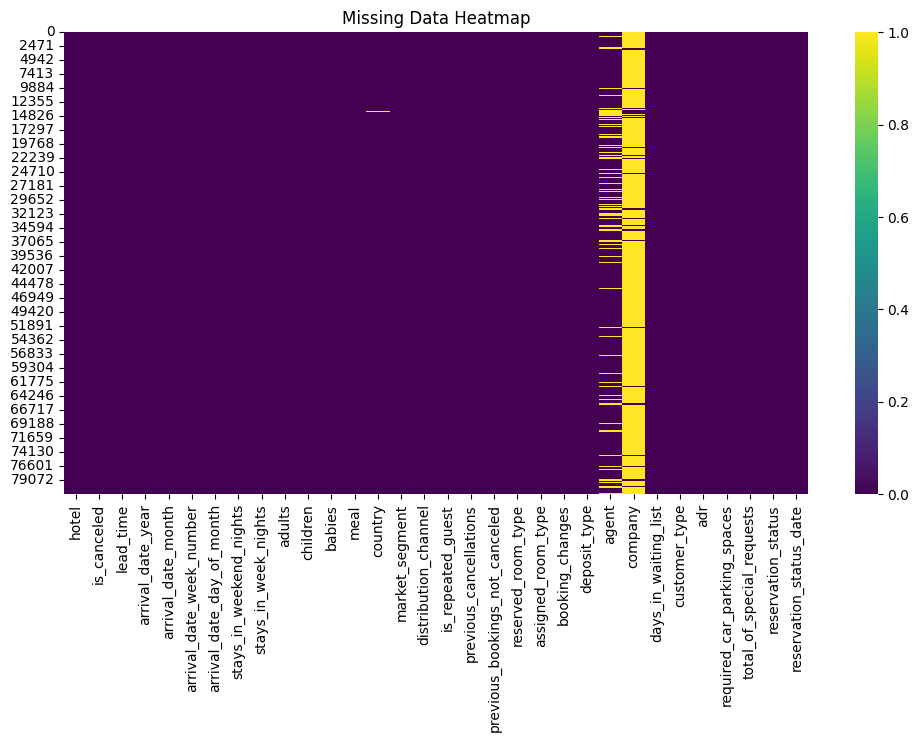

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=True,cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [11]:
#identify the percent of missing values in each column
missing_percent=(df.isnull().sum()/len(df))*100
print(missing_percent)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004906
babies                             0.000000
meal                               0.000000
country                            0.597275
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

**Detect Outliers**

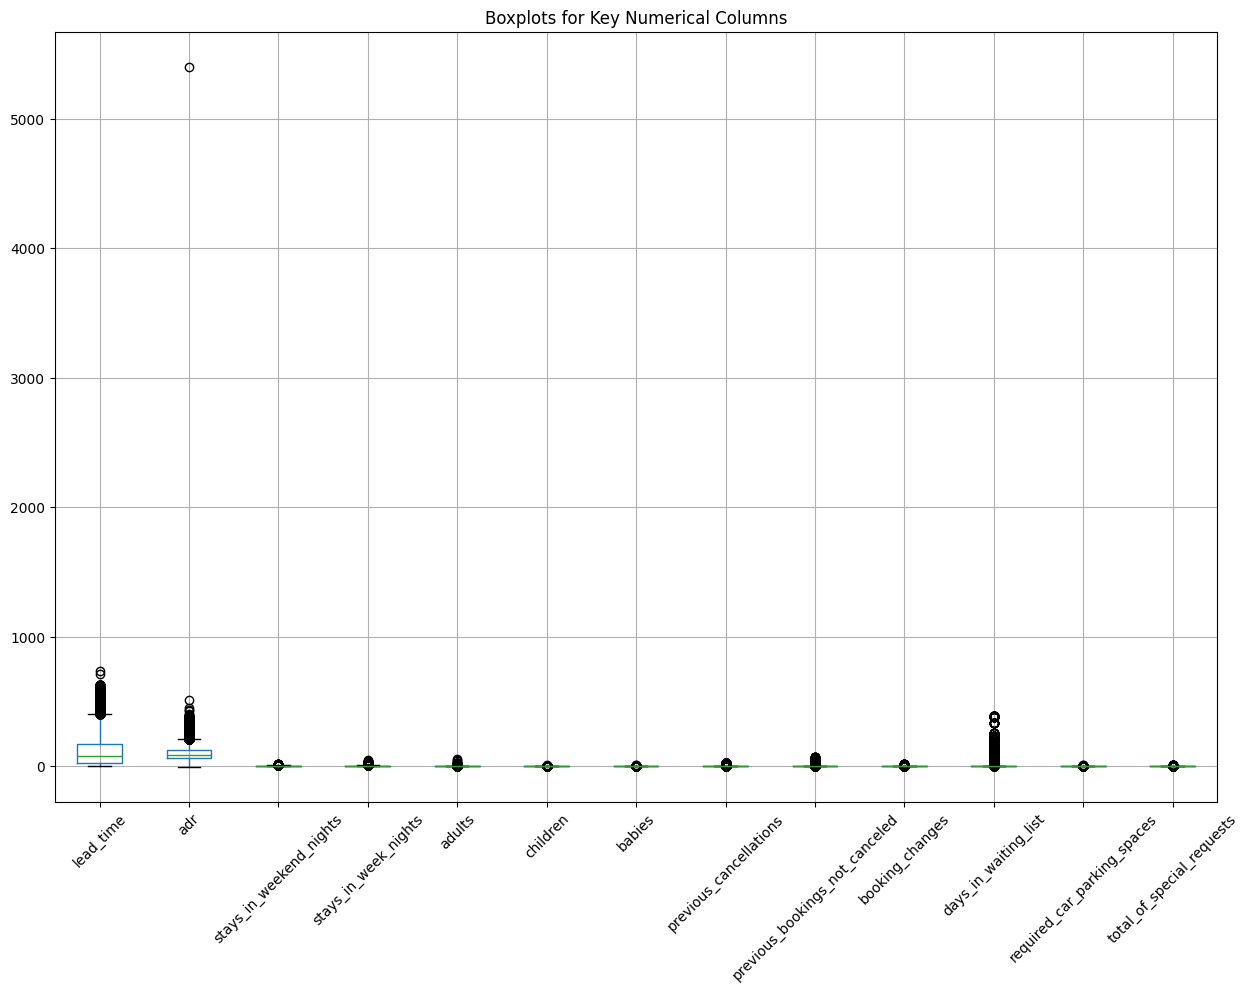

In [12]:
numeric_cols = [
    "lead_time",
    "adr",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "booking_changes",
    "days_in_waiting_list",
    "required_car_parking_spaces",
    "total_of_special_requests"
]

plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot()
plt.xticks(rotation=45) #for showing the complete name of the column
plt.title("Boxplots for Key Numerical Columns")
plt.show()

In [13]:
def detect_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

for col in numeric_cols:
    outliers = detect_outliers_IQR(df, col)
    print(f"{col}: {len(outliers)} outliers")

    if not outliers.empty:
        print("\nTop 5 largest outlier values:")
        print(outliers[col].sort_values(ascending=False).head(10).values)
    else:
        print("No outliers detected")

lead_time: 1620 outliers

Top 5 largest outlier values:
[737 709 629 629 629 629 629 629 629 629]
adr: 3093 outliers

Top 5 largest outlier values:
[5400.    508.    450.    437.    426.25  402.    397.38  392.    392.
  388.  ]
stays_in_weekend_nights: 250 outliers

Top 5 largest outlier values:
[19 18 16 16 14 13 13 12 12 12]
stays_in_week_nights: 3115 outliers

Top 5 largest outlier values:
[50 42 40 40 34 33 32 30 30 30]
adults: 18721 outliers

Top 5 largest outlier values:
[55 50 40 27 27 26 26 26 26 26]
children: 5629 outliers

Top 5 largest outlier values:
[10.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
babies: 671 outliers

Top 5 largest outlier values:
[10  9  2  2  2  2  2  2  2  2]
previous_cancellations: 5418 outliers

Top 5 largest outlier values:
[26 26 26 26 26 26 26 26 26 26]
previous_bookings_not_canceled: 2649 outliers

Top 5 largest outlier values:
[72 71 70 69 68 67 66 65 64 63]
booking_changes: 11223 outliers

Top 5 largest outlier values:
[20 17 17 16 15 15 14 13 13 13]

In [14]:
df[(df['babies']==10) | (df['babies']==9)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,NaN,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0.0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,NaN,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14


▶**Data Quality Report**

**The Main Quality Issues In Data:**

1.   there are **31994** duplicated values.

2.   **reservation_status_date** column's data type is object not date.


1.   **children** column's data type is float.
2.   **agent** column has **13.68 %** missing values.
2.   **company** column has **94.3 %** missing values.
2.   **country** column has **0.40 %** missing values.
2.   **children** column has **0.003 %** missing values and outlier value 10.


1.   **lead_time** column has many outliers which indicating that some customers book extremely early (up to 300-700 days in advance).

2.  **adr (Average Daily Rate)** column has extreme outliers with very high prices (above 5000).


1.   **days_in_waiting_list** column has some outliers which indicating that a few customers waited an unusually long time before their ressrvation was confirmed.

1. **babies** column has outliers 9 and 10.

1. **booking_changes** column has high values up to 10 times changes.

1. **previous_cancellations**  column has high values up to 25 times changes.











**Phase 2: Data Cleaning (The Core of the Project)**

▶  Handle Missing Values:

In [16]:
# For company and agent Replace missing values with 0.
df['company']=df['company'].fillna(0)
df['agent']=df['agent'].fillna(0)

In [17]:
# for country fill by new category  "unknown"
df['country']=df['country'].fillna('unknown')

In [18]:
# for children fill by mode
df['children']=df['children'].fillna(df['children'].mode()[0])

In [20]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


▶  Remove Duplicates:

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.shape

(56328, 32)

▶ Fix Data Types:

In [27]:
df['reservation_status_date'].value_counts()

,count
reservation_status_date,
2015-10-21,199
2015-12-08,165
2016-03-28,141
2016-10-06,141
2015-10-12,138
...,...
2015-04-27,1
2015-01-20,1
2015-02-17,1


In [28]:
df[df['reservation_status_date']=="2015-"]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
81536,City Hotel,1,218,2016,June,24,9,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,133.0,0.0,0,Transient,135.0,0,0,Canceled,2015-


In [29]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

In [34]:
df['reservation_status_date'].dtype

dtype('<M8[ns]')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56328 entries, 0 to 81536
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           56328 non-null  object        
 1   is_canceled                     56328 non-null  int64         
 2   lead_time                       56328 non-null  int64         
 3   arrival_date_year               56328 non-null  int64         
 4   arrival_date_month              56328 non-null  object        
 5   arrival_date_week_number        56328 non-null  int64         
 6   arrival_date_day_of_month       56328 non-null  int64         
 7   stays_in_weekend_nights         56328 non-null  int64         
 8   stays_in_week_nights            56328 non-null  int64         
 9   adults                          56328 non-null  int64         
 10  children                        56328 non-null  float64       
 11  babies 

In [37]:
df['children']=df['children'].astype('int64')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56328 entries, 0 to 81536
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           56328 non-null  object        
 1   is_canceled                     56328 non-null  int64         
 2   lead_time                       56328 non-null  int64         
 3   arrival_date_year               56328 non-null  int64         
 4   arrival_date_month              56328 non-null  object        
 5   arrival_date_week_number        56328 non-null  int64         
 6   arrival_date_day_of_month       56328 non-null  int64         
 7   stays_in_weekend_nights         56328 non-null  int64         
 8   stays_in_week_nights            56328 non-null  int64         
 9   adults                          56328 non-null  int64         
 10  children                        56328 non-null  int64         
 11  babies 